Chest X-Ray Image Classification

## Introduction

## Importing Libraries and Loading Images

### Libraries

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

### Load Images

In [2]:
#Directory path
train_data_dir = 'chest_xray/train/'
test_data_dir = 'chest_xray/test/'
val_data_dir = 'chest_xray/val/'

In [3]:
#Get all the data in each generator and reshaping the images
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=1200)

test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=150)

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Previewing Images

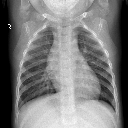

In [5]:
array_to_img(train_images[10])

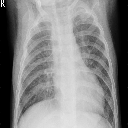

In [6]:
array_to_img(train_images[72])

## Images and Labels

### EDA of the Dataset

In [7]:
#exploring the data set
train_ex = train_images.shape[0]
num_px = train_images.shape[1]
test_ex = test_images.shape[0]
val_ex = val_images.shape[0]

print ("Number of training samples: " + str(train_ex))
print ("Number of testing samples: " + str(test_ex))
print ("Number of validation samples: " + str(val_ex))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 1200
Number of testing samples: 150
Number of validation samples: 16
train_images shape: (1200, 128, 128, 1)
train_labels shape: (1200, 2)
test_images shape: (150, 128, 128, 1)
test_labels shape: (150, 2)
val_images shape: (16, 128, 128, 1)
val_labels shape: (16, 2)


### Images

In [8]:
# # Reshaping the images
# train_images = train_images.reshape(1200, -1).T
# test_images = test_images.reshape(150, -1).T
# val_images = val_images.reshape(16, -1).T

In [9]:
#Reshaping the images
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)
val_images = val_images.reshape(val_images.shape[0], -1)

In [10]:
#Previewing the shape of train_images_unrow
print('Train Images:',np.shape(train_images))
print('Test Images:',np.shape(test_images))
print('Validation Images:',np.shape(val_images))

Train Images: (1200, 16384)
Test Images: (150, 16384)
Validation Images: (16, 16384)


### Labels

In [11]:
train_labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [12]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [13]:
# train_labels_final = train_labels.T[[1]]
# test_labels_final = test_labels.T[[1]]
# val_labels_final = val_labels.T[[1]]

In [14]:
train_l = np.reshape(train_labels[:,0], (1200,1))
test_l= np.reshape(test_labels[:,0], (150,1))
val_l = np.reshape(val_labels[:,0], (16,1))

In [15]:
print('Train Labels:',np.shape(train_l))
print('Test Labels:',np.shape(test_l))
print('Validation Labels:',np.shape(val_l))

Train Labels: (1200, 1)
Test Labels: (150, 1)
Validation Labels: (16, 1)


## Baseline Model

In [16]:
# Build a baseline fully connected model
np.random.seed(42)
model = models.Sequential()
model.add(layers.Dense(15, activation='relu', input_shape=(16384,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
#Creating a Compile
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['acc'])

In [18]:
#Creating History variable
history = model.fit(train_images,
                    train_l,
                    epochs=100,
                    batch_size=80,
                    validation_data=(val_images, val_l))

Epoch 1/100
15/15 [==============================] - 0s 13ms/step - loss: 0.6773 - acc: 0.6267 - val_loss: 0.7006 - val_acc: 0.5000
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6053 - acc: 0.7358 - val_loss: 0.7538 - val_acc: 0.5000
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5727 - acc: 0.7358 - val_loss: 0.7767 - val_acc: 0.5000
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5619 - acc: 0.7358 - val_loss: 0.8156 - val_acc: 0.5000
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5519 - acc: 0.7358 - val_loss: 0.7505 - val_acc: 0.5000
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5432 - acc: 0.7358 - val_loss: 0.7870 - val_acc: 0.5000
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5276 - acc: 0.7358 - val_loss: 0.8141 - val_acc: 0.5000
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5068 - 

Epoch 63/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1550 - acc: 0.9450 - val_loss: 0.8515 - val_acc: 0.6875
Epoch 64/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1473 - acc: 0.9467 - val_loss: 0.4703 - val_acc: 0.8125
Epoch 65/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1278 - acc: 0.9542 - val_loss: 0.3197 - val_acc: 0.8750
Epoch 66/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1694 - acc: 0.9317 - val_loss: 0.3966 - val_acc: 0.8750
Epoch 67/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1523 - acc: 0.9400 - val_loss: 0.4056 - val_acc: 0.8125
Epoch 68/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1267 - acc: 0.9550 - val_loss: 0.5382 - val_acc: 0.8125
Epoch 69/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1241 - acc: 0.9517 - val_loss: 0.6378 - val_acc: 0.7500
Epoch 70/100
15/15 [==============================] - 0s 6ms/step - loss: 0.

### Results

In [19]:
result_train = model.evaluate(train_images, train_l)

38/38 [==============================] - 0s 2ms/step - loss: 0.2510 - acc: 0.8992


In [20]:
results_test = model.evaluate(test_images, test_l)

5/5 [==============================] - 0s 1ms/step - loss: 0.4215 - acc: 0.8200


In [21]:
result_train

[0.25102055072784424, 0.8991666436195374]

In [22]:
results_test

[0.4214751422405243, 0.8199999928474426]

## CNN

In [59]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 60, 60, 32)        16416     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 12544)           

In [61]:
model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [62]:
#Creating History variable
history = model.fit(train_images,
                    train_l,
                    epochs=100,
                    batch_size=80,
                    validation_data=(val_images, val_l))

Epoch 1/100


ValueError: in user code:

    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_13 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [80, 16384]


### Results

In [58]:
print(val_images.shape)

(16, 16384)


## Data Augmentation

### Class Imbalance

>Quick EDAs to see the severity of class imbalance

In [91]:
import warnings
warnings.filterwarnings("ignore")

In [92]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

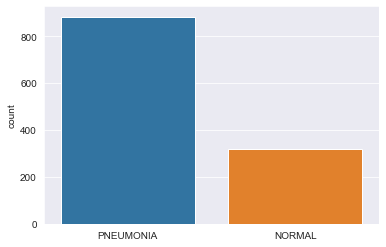

In [104]:
train_case = []
for i in train_labels:
    if(i[1] == 0):
        train_case.append("NORMAL")
    else:
        train_case.append("PNEUMONIA")
sns.countplot(train_case);     

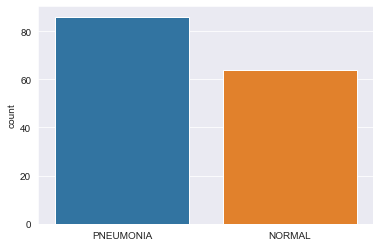

In [105]:
test_case = []
for i in test_labels:
    if(i[1] == 0):
        test_case.append("NORMAL")
    else:
        test_case.append("PNEUMONIA")
sns.countplot(test_case);   

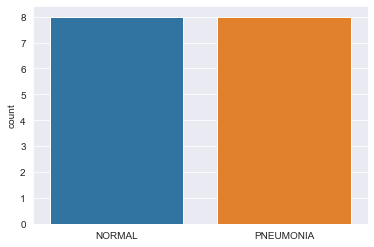

In [106]:
val_case = []
for i in val_labels:
    if(i[1] == 0):
        val_case.append("NORMAL")
    else:
        val_case.append("PNEUMONIA")
sns.countplot(val_case);

Both the train set and test has a severe class imbalance so we will need to preform some data augmentation to create more normal images to match the number of pneumonia images. Whereas the validation set is equal so it will not need any adjustment.

### Augmentation Generator

In [97]:
train_aug_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.3, 
                                   height_shift_range=0.2, 
                                   zoom_range=0.2, 
                                   vertical_flip=True)

In [98]:
test_aug_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.3, 
                                   height_shift_range=0.2,  
                                   zoom_range=0.2, 
                                   vertical_flip=True)

In [99]:
#Get all the data in each generator and reshaping the images
train_generator = train_aug_gen.flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=1200)

test_generator = test_aug_gen.flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=150)

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [100]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128,  1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [108]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 60, 60, 32)        16416     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12544)           

In [109]:
history_2 = model.fit(train_generator, 
                      steps_per_epoch=10, 
                      epochs=5, 
                      validation_data=val_generator, 
                      validation_steps=10)

Epoch 1/5
 5/10 [==============>...............] - 61s 12s/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000


### Results

In [102]:
test_images, test_l = next(test_generator)

In [103]:
results_test = model.evaluate(test_images, test_l)

ValueError: in user code:

    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1176 test_step
        self.compiled_loss(
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:1605 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\backend.py:4823 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\ops\nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 1) vs (None, 2))


In [89]:
results_test

[0.4214751422405243, 0.8199999928474426]

## Final Model

### Results

## Conclusion